In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# load local data here

In [2]:
column_names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"]

files = [file for file in os.listdir('./data/XAUUSD/')]
files

['DAT_MT_XAUUSD_M1_2015.csv',
 'DAT_MT_XAUUSD_M1_2019.csv',
 'DAT_MT_XAUUSD_M1_2014.csv',
 'DAT_MT_XAUUSD_M1_2018.csv',
 'DAT_MT_XAUUSD_M1_2016.csv',
 'DAT_MT_XAUUSD_M1_2012.csv',
 'DAT_MT_XAUUSD_M1_2009.csv',
 'DAT_MT_XAUUSD_M1_2021.csv',
 'DAT_MT_XAUUSD_M1_2010.csv',
 'DAT_MT_XAUUSD_M1_2020.csv',
 'DAT_MT_XAUUSD_M1_2022.csv',
 'DAT_MT_XAUUSD_M1_2011.csv',
 'DAT_MT_XAUUSD_M1_2017.csv',
 'DAT_MT_XAUUSD_M1_2013.csv']

# Loop throught all the data files and merge them into one CSV file

In [3]:
data = pd.DataFrame() # initialize empty dataframe

# loop through the files located inside the data/XAUUSD folder
for file in files:
#     print(file)
    df = pd.read_csv("./data/XAUUSD/"+file, names=column_names)
    data = pd.concat([data, df])

data.to_csv("all_data.csv", index=False) # save dataframe to CSV file

In [4]:
data = pd.read_csv("./all_data.csv") # read data from newly created CSV file
data

,Date,Time,Open,High,Low,Close,Volume
0,2015.01.01,18:01,1184.13,1184.44,1184.04,1184.13,0
1,2015.01.01,18:02,1184.12,1184.41,1184.12,1184.41,0
2,2015.01.01,18:03,1184.53,1184.54,1184.32,1184.54,0
3,2015.01.01,18:04,1184.60,1184.60,1184.43,1184.51,0
4,2015.01.01,18:05,1184.46,1184.54,1184.46,1184.54,0
...,...,...,...,...,...,...,...
4862461,2013.12.31,15:55,1202.29,1202.59,1202.28,1202.59,0
4862462,2013.12.31,15:56,1202.58,1202.74,1202.58,1202.68,0
4862463,2013.12.31,15:57,1202.67,1202.90,1202.67,1202.89,0
4862464,2013.12.31,15:58,1202.96,1203.11,1202.95,1203.05,0


# Filter dataframe to produce only daily data from existing data

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y.%m.%d') # format and convert the Date column into datetime object
data = data.drop_duplicates(subset='Date') # select daily data by selecting the first occurence of rows of the date column
data

,Date,Time,Open,High,Low,Close,Volume
0,2015-01-01,18:01,1184.13,1184.44,1184.04,1184.13,0
347,2015-01-02,00:00,1184.69,1184.79,1184.48,1184.62,0
1360,2015-01-04,18:00,1187.01,1187.01,1186.65,1187.00,0
1717,2015-01-05,00:00,1191.69,1192.09,1191.61,1191.70,0
3093,2015-01-06,00:00,1206.55,1207.23,1206.55,1206.58,0
...,...,...,...,...,...,...,...
4857725,2013-12-26,06:09,1205.70,1205.70,1205.70,1205.70,0
4858741,2013-12-27,00:00,1211.03,1211.15,1210.93,1211.06,0
4859755,2013-12-29,18:00,1214.20,1214.60,1214.20,1214.45,0
4860115,2013-12-30,00:00,1209.71,1209.72,1209.61,1209.63,0


In [6]:
data = data.set_index(['Date']) # use the date column as the index
data

,Time,Open,High,Low,Close,Volume
Date,,,,,,
2015-01-01,18:01,1184.13,1184.44,1184.04,1184.13,0
2015-01-02,00:00,1184.69,1184.79,1184.48,1184.62,0
2015-01-04,18:00,1187.01,1187.01,1186.65,1187.00,0
2015-01-05,00:00,1191.69,1192.09,1191.61,1191.70,0
2015-01-06,00:00,1206.55,1207.23,1206.55,1206.58,0
...,...,...,...,...,...,...
2013-12-26,06:09,1205.70,1205.70,1205.70,1205.70,0
2013-12-27,00:00,1211.03,1211.15,1210.93,1211.06,0
2013-12-29,18:00,1214.20,1214.60,1214.20,1214.45,0


In [7]:
df = df.iloc[::-1] # This reverses the order of the dataframe rows

In [8]:
data = data.drop(['Time','Volume'], axis='columns') # drop irrelevant columns
data

,Open,High,Low,Close
Date,,,,
2015-01-01,1184.13,1184.44,1184.04,1184.13
2015-01-02,1184.69,1184.79,1184.48,1184.62
2015-01-04,1187.01,1187.01,1186.65,1187.00
2015-01-05,1191.69,1192.09,1191.61,1191.70
2015-01-06,1206.55,1207.23,1206.55,1206.58
...,...,...,...,...
2013-12-26,1205.70,1205.70,1205.70,1205.70
2013-12-27,1211.03,1211.15,1210.93,1211.06
2013-12-29,1214.20,1214.60,1214.20,1214.45


# Function to plot graphs

In [9]:
def plot_graph(figsize, values, column_name):
  plt.figure()
  values.plot(figsize = figsize)
  plt.xlabel("years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of Gold data")

In [10]:
data.columns # list column names

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

# Loop to plot graphs using the plot_graph function

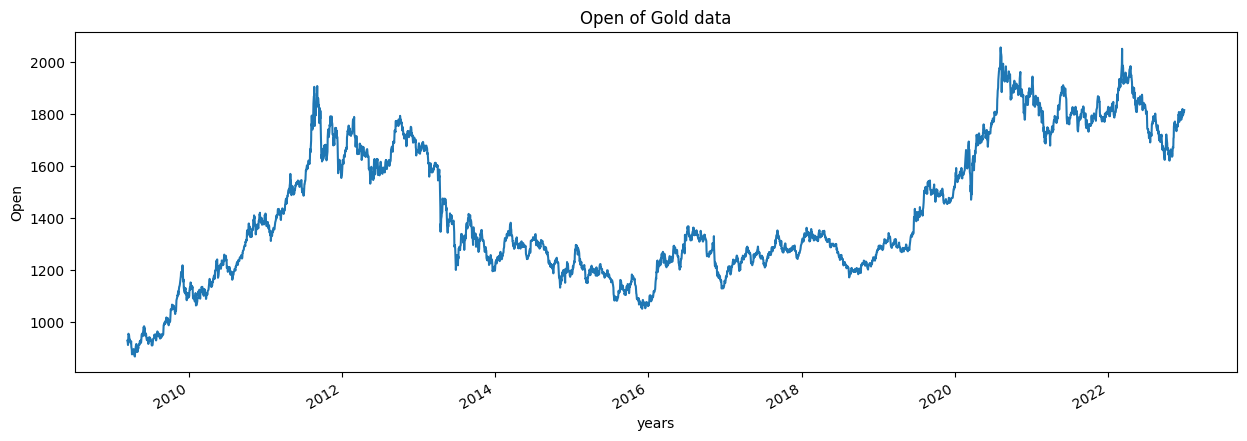

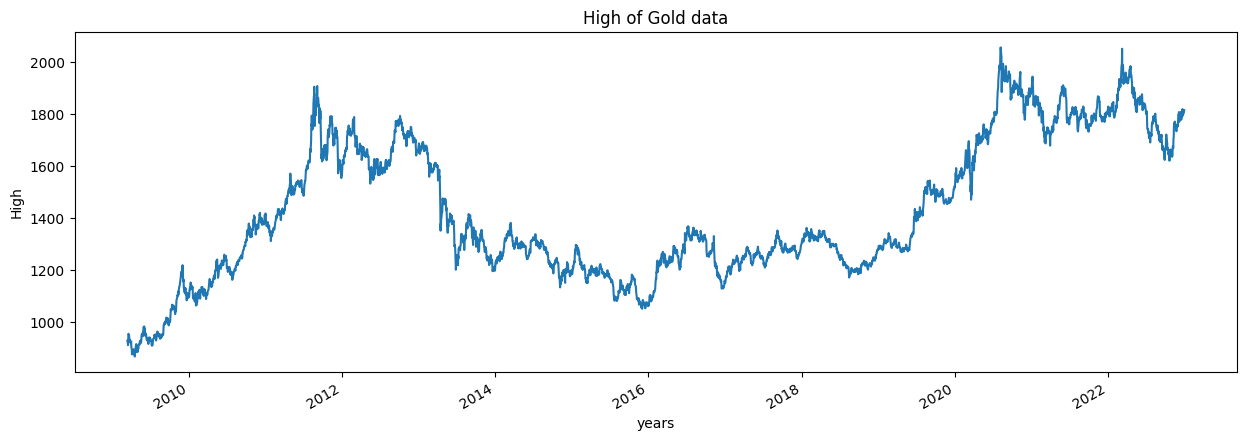

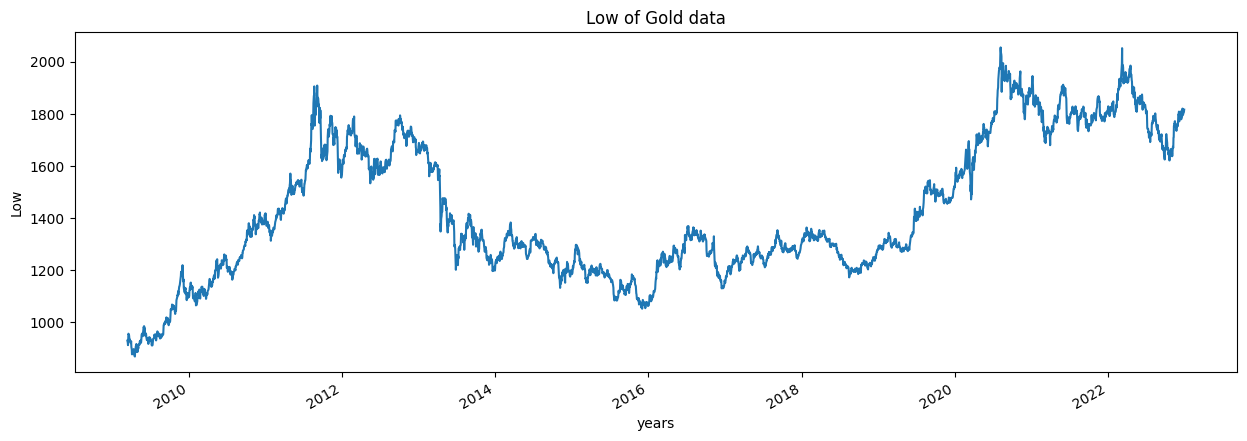

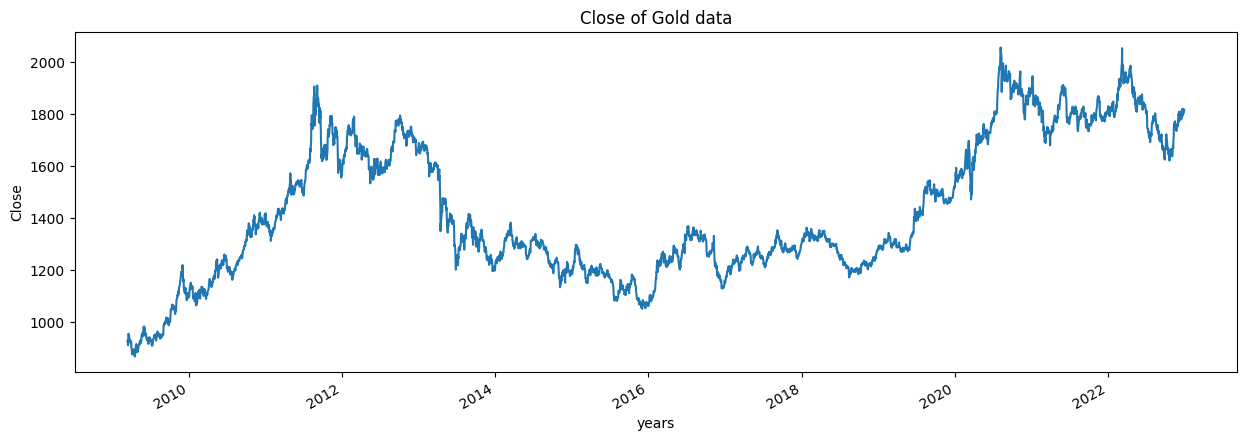

In [11]:
for column in data.columns:
  plot_graph((15,5), data[column], column)

In [12]:
data['ma_100_days'] = data.Close.rolling(100).mean() # 100 days moving average
data['ma_100_days'][0:100].tail()

,ma_100_days
Date,
2015-04-22,NaN
2015-04-23,NaN
2015-04-24,NaN
2015-04-26,NaN
2015-04-27,1215.1951


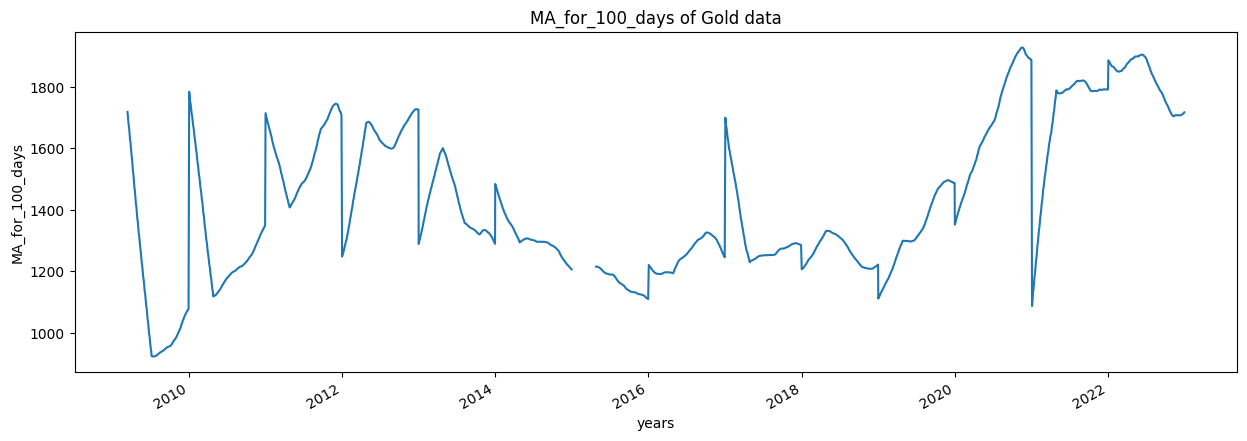

In [13]:

ma_100_days = data['ma_100_days']
plot_graph((15,5), ma_100_days, 'MA_for_100_days')

In [14]:
# plt.figure(figsize=(15,6))
# plt.plot(ma_100_days, 'r')
# plt.plot(data.Close, 'g')
# plt.show()

In [15]:
# plot_graph((15,5), data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

In [16]:
data['ma_250_days'] = data.Close.rolling(250).mean() # 250 days moving average
ma_250_days = data['ma_250_days']

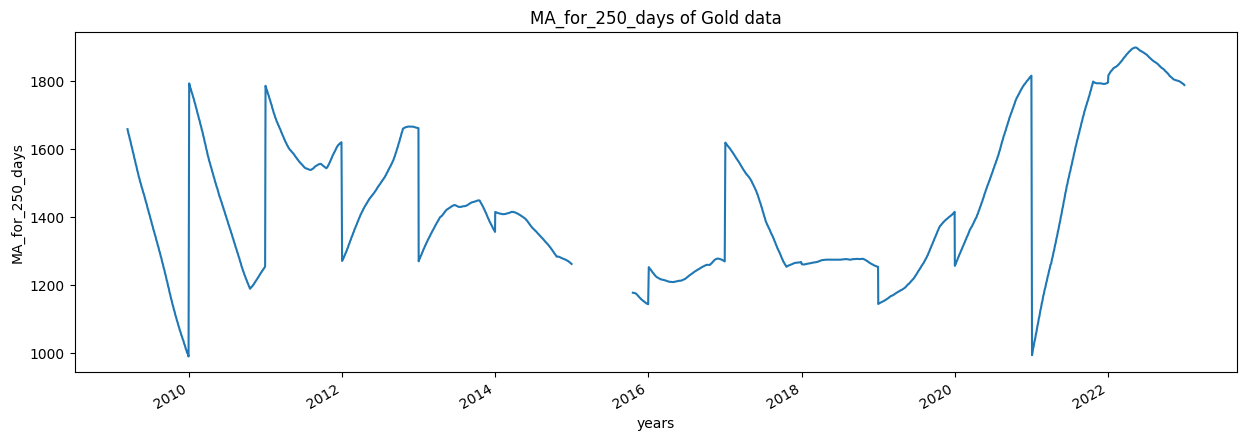

In [17]:
plot_graph((15,5), ma_250_days, 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

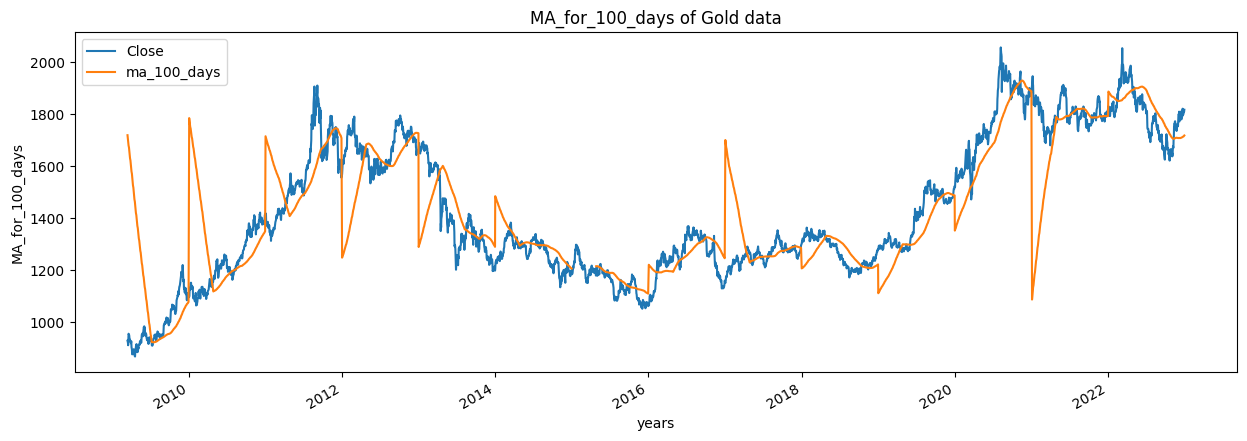

In [18]:
plot_graph((15,5), data[['Close','ma_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

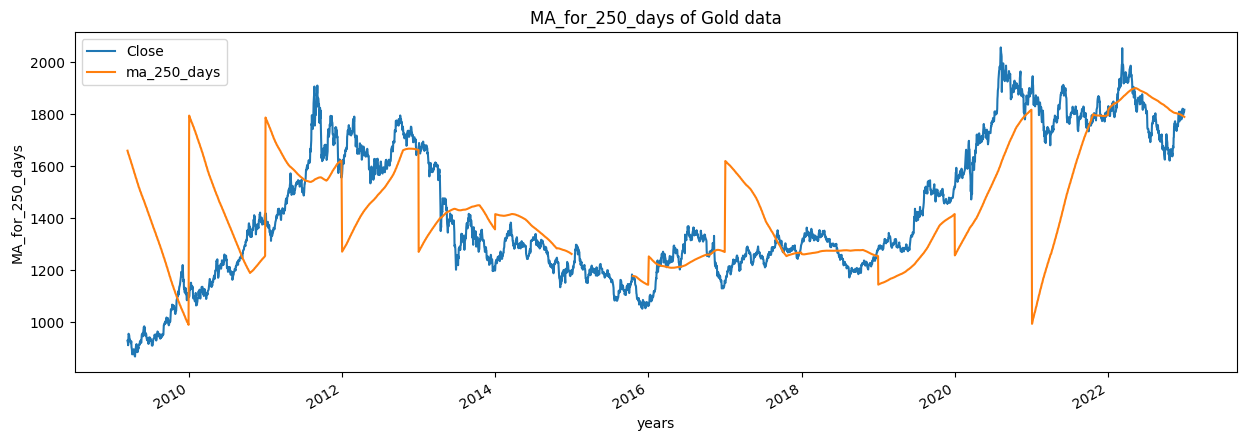

In [19]:
plot_graph((15,5), data[['Close','ma_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

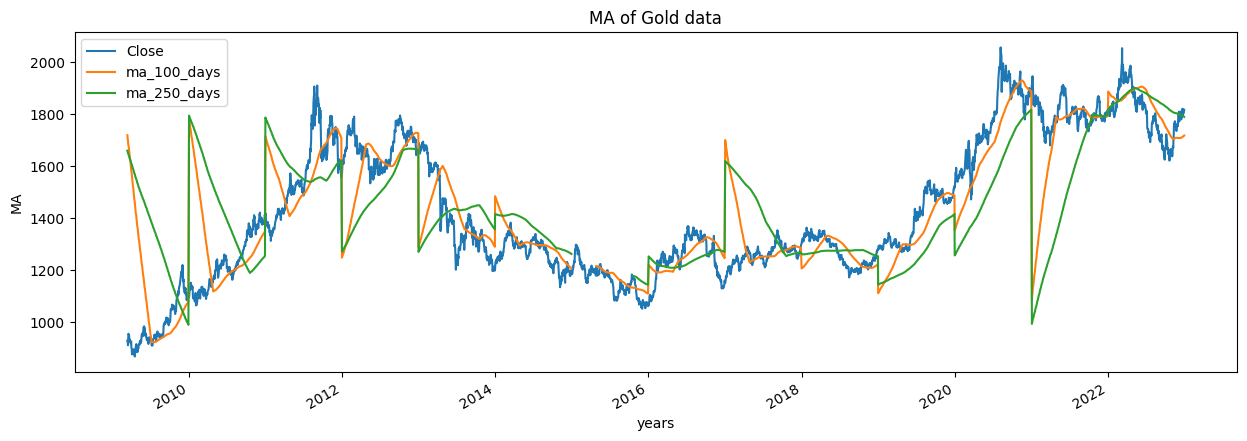

In [20]:
plot_graph((15,5), data[['Close','ma_100_days', 'ma_250_days']], 'MA')

In [21]:
data['percentage_change_cp'] = data['Close'].pct_change() # this creates a new column with the name 'percentage_change_cp' with values coming from the percentage changes on the Close column
data[['Close', 'percentage_change_cp']]

,Close,percentage_change_cp
Date,,
2015-01-01,1184.13,NaN
2015-01-02,1184.62,0.000414
2015-01-04,1187.00,0.002009
2015-01-05,1191.70,0.003960
2015-01-06,1206.58,0.012486
...,...,...
2013-12-26,1205.70,0.005949
2013-12-27,1211.06,0.004446
2013-12-29,1214.45,0.002799


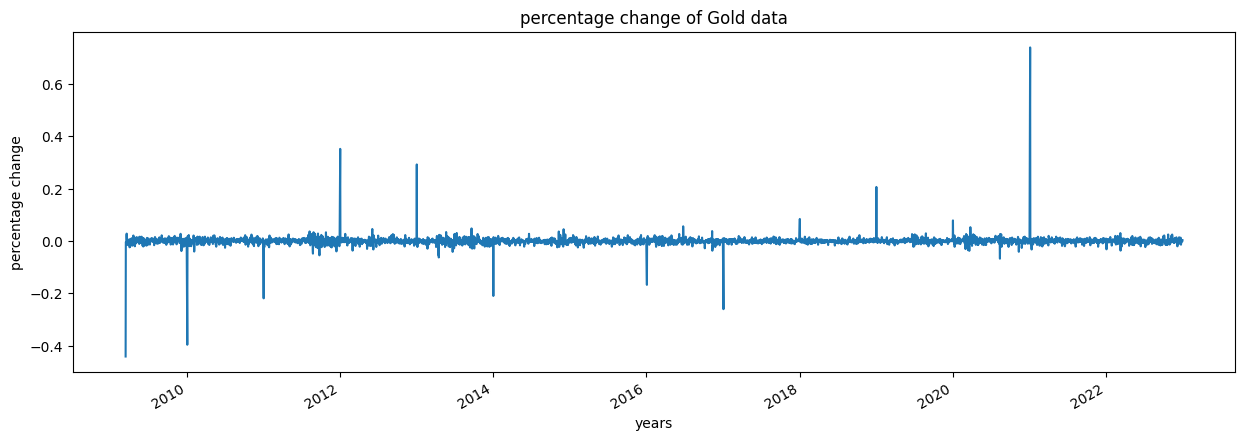

In [22]:
plot_graph((15,5), data['percentage_change_cp'], 'percentage change')

In [23]:
data.dropna(inplace=True) # Data cleaning step to drop null values
data

,Open,High,Low,Close,ma_100_days,ma_250_days,percentage_change_cp
Date,,,,,,,
2015-10-19,1172.00,1172.00,1171.76,1171.85,1132.8809,1177.81020,-0.003944
2015-10-20,1168.55,1168.58,1168.54,1168.57,1132.7950,1177.74796,-0.002799
2015-10-21,1177.06,1177.11,1177.05,1177.10,1132.8223,1177.71788,0.007300
2015-10-22,1166.14,1166.25,1166.11,1166.15,1132.6309,1177.63448,-0.009303
2015-10-23,1168.93,1169.01,1168.93,1168.94,1132.5020,1177.54344,0.002392
...,...,...,...,...,...,...,...
2013-12-26,1205.70,1205.70,1205.70,1205.70,1297.1807,1362.65204,0.005949
2013-12-27,1211.03,1211.15,1210.93,1211.06,1295.3588,1361.18156,0.004446
2013-12-29,1214.20,1214.60,1214.20,1214.45,1293.6049,1359.71628,0.002799


In [24]:
close_price = data[['Close']] # close price variable from Close column

In [25]:
max(close_price.values),min(close_price.values) # maximum and minimum values from the '

(array([2054.838]), array([868.88]))

# Data Normalization



In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_price)
scaled_data

array([[0.25546436],
       [0.25269866],
       [0.25989116],
       ...,
       [0.29138469],
       [0.28732046],
       [0.27791878]])

In [27]:
len(scaled_data)

4045

In [28]:
x_data = []
y_data = []

# generate x_data and y_data from the scaled_data
for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)


In [29]:
# x, y = np.array(x), np.array(y)
x_data[0],y_data[0]

(array([[0.25546436],
        [0.25269866],
        [0.25989116],
        [0.25065812],
        [0.25301065],
        [0.24842364],
        [0.24915722],
        [0.24898858],
        [0.2518133 ],
        [0.24582658],
        [0.23454456],
        [0.22997442],
        [0.22943477],
        [0.22661848],
        [0.21315257],
        [0.2037256 ],
        [0.20168505],
        [0.18652431],
        [0.18907078],
        [0.1887082 ],
        [0.18827817],
        [0.18429826],
        [0.18105194],
        [0.18493066],
        [0.18907078],
        [0.17976185],
        [0.16806666],
        [0.17587469],
        [0.18093389],
        [0.17530132],
        [0.1705288 ],
        [0.17115277],
        [0.17631316],
        [0.17309213],
        [0.16790645],
        [0.15994664],
        [0.15740861],
        [0.17019152],
        [0.16801607],
        [0.15455859],
        [0.16216426],
        [0.1829913 ],
        [0.18246009],
        [0.17164183],
        [0.17552898],
        [0

In [30]:
# from keras.layers import Dense, Dropout, LSTM
# from keras.models import Sequential

In [31]:
int(len(x_data)*0.8)

3156

In [32]:
4908-100-int(len(x_data)*0.8)

1652

# Data Splitting into Training and Testing Data

In [33]:
splitting_len = int(len(x_data)*0.8)
x_train = x_data[:splitting_len] # training independent variable
y_train = y_data[:splitting_len] # training dependent variable

x_test = x_data[splitting_len:] # test independent variable
y_test = y_data[splitting_len:] # test depedent variable

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3156, 100, 1)
(3156, 1)
(789, 100, 1)
(789, 1)


# Model Training

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [36]:
model = Sequential()
# adding the model layers (you can add as many layers as possible)
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1))) # first layer LSTM
model.add(LSTM(64,return_sequences=False)) # second layer LSTM
model.add(Dense(25)) # 25 neurons
model.add(Dense(1)) # output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error') # model compilation

In [ ]:
model.fit(x_train,y_train, epochs = 50, batch_size =32, verbose =1) # model training

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 24s 188ms/step - loss: 0.0389
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 19s 180ms/step - loss: 0.0024
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - loss: 0.0021
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 176ms/step - loss: 0.0019
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 177ms/step - loss: 0.0016
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 177ms/step - loss: 0.0016
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 178ms/step - loss: 0.0015
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 21s 179ms/step - loss: 8.4600e-04
Epoch 9/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 179ms/step - loss: 7.2861e-04
Epoch 10/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 178ms/step - loss: 0.0011
Epoch 11/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 22s 191ms/step - loss: 6.0246e-04
Epoch 12/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - loss: 9.5504e-04
Epoch 13/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 23s 204ms/step - loss: 0.0013
Epoch 14/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step - loss: 8.4668e-04
Epoch 15/50
99/99 ━━━━━

In [44]:
model.summary() # model summary

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [45]:
predictions = model.predict(x_test) # model prediction

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


In [46]:
predictions

array([[0.41877654],
       [0.40263793],
       [0.35972264],
       [0.3586273 ],
       [0.35479763],
       [0.34582254],
       [0.32370248],
       [0.31007525],
       [0.28412893],
       [0.30267656],
       [0.3115415 ],
       [0.32532248],
       [0.31794703],
       [0.32257223],
       [0.31591186],
       [0.30016217],
       [0.29427958],
       [0.3183956 ],
       [0.31709316],
       [0.343041  ],
       [0.34769025],
       [0.35159212],
       [0.35221994],
       [0.3454595 ],
       [0.35208055],
       [0.34401685],
       [0.3525865 ],
       [0.35764673],
       [0.37227312],
       [0.38968438],
       [0.3947601 ],
       [0.38130775],
       [0.3916514 ],
       [0.3899451 ],
       [0.38432917],
       [0.38437304],
       [0.38811535],
       [0.38010404],
       [0.36790547],
       [0.3702735 ],
       [0.37511525],
       [0.3594748 ],
       [0.3450033 ],
       [0.35410452],
       [0.36958027],
       [0.3750156 ],
       [0.38568902],
       [0.391

In [47]:
inv_predictions = scaler.inverse_transform(predictions) # input predictions
inv_predictions

array([[1365.5314],
       [1346.3917],
       [1295.496 ],
       [1294.1969],
       [1289.655 ],
       [1279.0111],
       [1252.7776],
       [1236.6163],
       [1205.845 ],
       [1227.8417],
       [1238.3551],
       [1254.6989],
       [1245.9519],
       [1251.4371],
       [1243.5382],
       [1224.8597],
       [1217.8832],
       [1246.4839],
       [1244.9392],
       [1275.7122],
       [1281.2261],
       [1285.8534],
       [1286.598 ],
       [1278.5804],
       [1286.4329],
       [1276.8695],
       [1287.0328],
       [1293.0339],
       [1310.3802],
       [1331.0293],
       [1337.049 ],
       [1321.095 ],
       [1333.362 ],
       [1331.3385],
       [1324.6783],
       [1324.7303],
       [1329.1685],
       [1319.6675],
       [1305.2004],
       [1308.0088],
       [1313.751 ],
       [1295.202 ],
       [1278.0394],
       [1288.8331],
       [1307.1866],
       [1313.6328],
       [1326.291 ],
       [1332.9756],
       [1321.5852],
       [1334.6348],


In [49]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2)) # roor mean square error
rmse

11.45681729912097

# plotting data vs original data

In [50]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2013-06-20,1347.06,1365.531372
2013-06-21,1291.67,1346.391724
2013-06-23,1297.44,1295.495972
2013-06-24,1290.85,1294.196899
2013-06-25,1278.87,1289.655029


In [48]:
inv_y_test = scaler.inverse_transform(y_test) # output predictions
inv_y_test

array([[1347.06 ],
       [1291.67 ],
       [1297.44 ],
       [1290.85 ],
       [1278.87 ],
       [1250.04 ],
       [1236.02 ],
       [1201.9  ],
       [1234.95 ],
       [1241.1  ],
       [1258.71 ],
       [1245.13 ],
       [1254.58 ],
       [1243.9  ],
       [1223.54 ],
       [1219.26 ],
       [1254.54 ],
       [1245.39 ],
       [1283.25 ],
       [1283.1  ],
       [1288.6  ],
       [1289.07 ],
       [1279.86 ],
       [1290.71 ],
       [1277.67 ],
       [1291.59 ],
       [1296.25 ],
       [1315.43 ],
       [1336.15 ],
       [1339.97 ],
       [1321.6  ],
       [1338.69 ],
       [1333.9  ],
       [1326.82 ],
       [1327.9  ],
       [1332.68 ],
       [1321.   ],
       [1306.12 ],
       [1311.59 ],
       [1317.17 ],
       [1294.73 ],
       [1278.37 ],
       [1293.68 ],
       [1312.18 ],
       [1316.29 ],
       [1330.31 ],
       [1336.13 ],
       [1322.52 ],
       [1339.65 ],
       [1364.86 ],
       [1379.6  ],
       [1380.99 ],
       [1363

<Figure size 640x480 with 0 Axes>

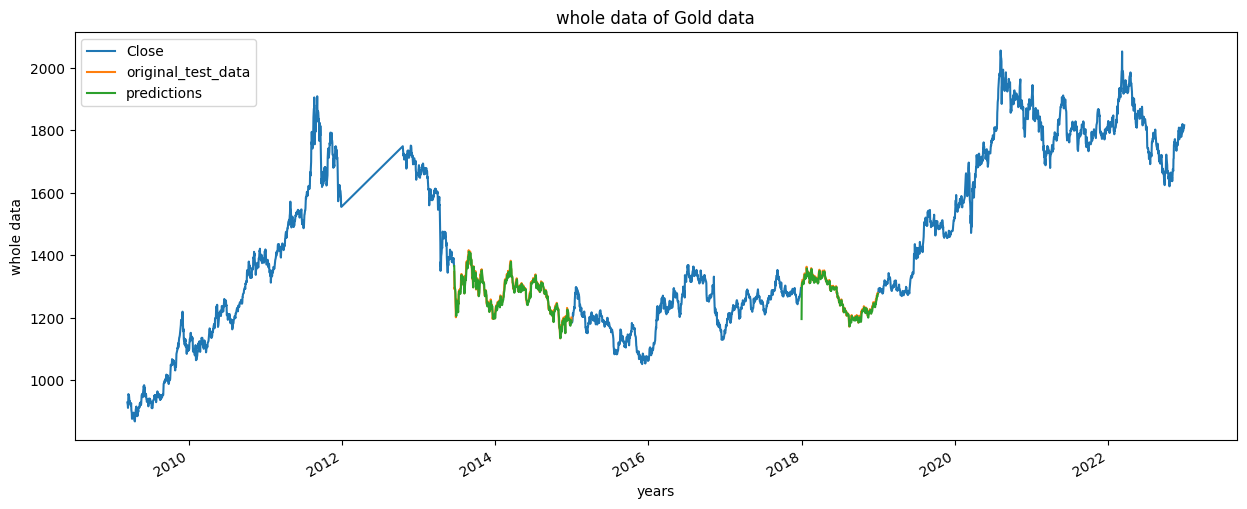

In [51]:
plot_graph((15,6), pd.concat([close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [52]:
model.save('Stock_Predictions_Model.keras')